# Varios

En este notebook comentamos brevemente algunas técnicas específicas.

## Detección de caras

El método clásico ([Viola & Jones, 2001](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework)) esta basado en [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost), que es una técnica muy importante dentro de *Machine Learning* basada en la combinación de "weak features" para conseguir un clasificador de alta precisión. OpenCV incluye una buena implementación. Detecta la cara y dentro de ella otras zonas como los ojos, nariz, etc., como se muestra a continuación.

Pero en la actualidad es más recomendable el detector de caras disponible en el paquete DLIB que hemos utilizado ya en el ejercicio de los *face landmarks*. Lo usaremos también en el capítulo de Deep Learning como apoyo para el reconocimiento de la identidad de la personas.

Por su interés histórico mostramos aquí el uso de la implementación del método AdaBoost disponible en OpenCV.

In [1]:
import numpy as np
import cv2   as cv

import matplotlib.pyplot as plt
%matplotlib inline

def readrgb(file):
    return cv.cvtColor( cv.imread('../images/'+file), cv.COLOR_BGR2RGB) 

def rgb2gray(x):
    return cv.cvtColor(x,cv.COLOR_RGB2GRAY)

In [2]:
# intentamos encontrar automáticamente la ubicación de las cascadas (los clasificadores preentrenados)

# ! conda info

import os
conda_prefix = os.getenv("CONDA_PREFIX")
print(conda_prefix)

# pon aquí el path de tu instalación
cpath = "/path/to/miniconda/envs/via/lib/python3.8/site-packages/cv2/data/"

# Comprobamos que los dectectores se han cargado bien
face_cascade = cv.CascadeClassifier(cpath+'/haarcascade_frontalface_default.xml')
print(not face_cascade.empty())

eye_cascade = cv.CascadeClassifier(cpath+'haarcascade_eye.xml')
print(not eye_cascade.empty())

None
True
True


Lo probamos con algunas imágenes del repositorio. También es fácil ponerlo en marcha con la webcam.

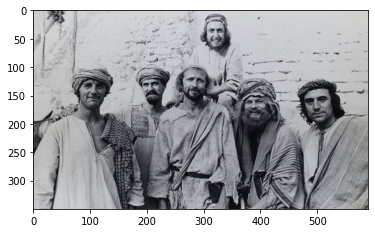

In [3]:
img = readrgb('monty-python1.jpg')
plt.imshow(img);

In [4]:
faces = face_cascade.detectMultiScale(img)

Devuelve una colección de rectángulos.

In [5]:
faces

array([[300,  19,  44,  44],
       [260, 104,  50,  50],
       [179, 107,  57,  57],
       [ 78, 111,  58,  58],
       [364, 142,  49,  49],
       [467, 135,  63,  63]], dtype=int32)

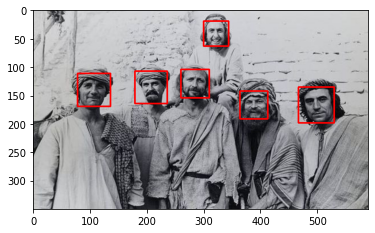

In [6]:
out = img.copy()

for (x,y,w,h) in faces:
    cv.rectangle(out,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(out);

[[215  49  62  62]
 [389  79  61  61]
 [120  71  60  60]
 [ 55  83  55  55]
 [307  83  57  57]
 [ 48  54  69  69]
 [119 135  54  54]
 [291 215  55  55]
 [160 278  48  48]]


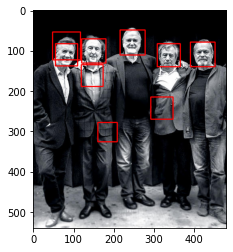

In [7]:
img = readrgb('monty-python2.jpg')
faces = face_cascade.detectMultiScale(img)
print(faces)
out = img.copy()
for (x,y,w,h) in faces:
    cv.rectangle(out,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(out);

[[150  88 288 288]]


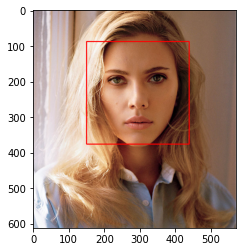

In [8]:
img = readrgb('scarlett.jpg')
faces = face_cascade.detectMultiScale(img)
print(faces)
out = img.copy()
for (x,y,w,h) in faces:
    cv.rectangle(out,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(out);

Dentro de las caras detectamos los ojos con el "eye_cascade". (En la foto de Scarlett mi versión de opencv detecta 3 ojos).

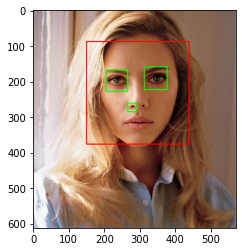

In [9]:
out = img.copy()

for (x,y,w,h) in faces:
    cv.rectangle(out,(x,y),(x+w,y+h),(255,0,0),2)
    roi = out[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(out);

Como ejercicio puedes comparar informalmente la precisión y el tiempo de cómputo de este detector y el disponible en DLIB.

## Reconocimiento óptico de caracteres (OCR)

El reconocimiento de caracteres impresos en imágenes de alta resolución escaneadas con buena calidad y sin ruido puede abordarse mediante una sencilla comparación con los modelos de cada letra. Pero en situaciones más realistas, donde hay ruido y menor resolución, es necesario un ataque más elaborado. El problema se complica aún más si en lugar de escanear el texto lo capturamos con una cámara.

La imagen siguiente es un texto escaneado (hace tiempo) en modo binario:

<img src="../images/texto.png" width="800px"/>

Cuando ampliamos la imagen observamos que muchas letras son componentes conexas independientes, que en principio pueden reconocerse fácilmente. Pero también hay algunos casos de letras unidas, como la secuencia "arru", en la que la comparación de las manchas con los modelos requiere partirla correctamente en trozos. Esto da lugar a una combinatoria que finalmente solo se puede resolver de forma probabilística y con un diccionario de palabras válidas. Si la intensidad de la tinta es pequeña, algunas letras pueden aparecer divididas en varias componentes conexas, lo cual aumenta aún más la combinatoria.

<img src="../images/demos/texto-detalle.png" width="500px"/>

Se puede abordar el desarrollo de un OCR sencillo como práctica opcional. Si estás interesado consulta con el profesor.

### Tesseract

Existen muchos OCR comerciales. Dentro de las soluciones de software libre destacamos el paquete [tesseract](https://github.com/tesseract-ocr). Dispone de un ejecutable y de una biblioteca que se puede utilizar por programa desde Python y otros lenguajes.

Veamos el resultado que consigue el ejecutable con el texto de prueba anterior (disponible en el repositorio).


**> tesseract texto.png resul**
    
<pre>Quizé sea éste uno de los articulos més ilusos que uno pueda escribir
hoy en d1’a en una socicdad tan autocomplaciente y autoindulgente
como la espaﬁola actual, y eso que tengo conciencia de haber ya
publicado unos cuantos dc esa indole —i1usa, quiero decir-. Porque si
para algo no estzi la superﬁcialidad ambiente es para atender, a estas
alturas, a asuntos que ni siquiera sé cémo caliﬁcar si no es con
anticuadas palabras, casi arrumbadas; y desde luego no deseo recurrir a
la ya vacua -por estrujada- "ética": Lasuntos que ataﬁen a la rectitud?
g,A1o venial y a lo grave? g,A1as conductas? (,A1a dignidad? Si, todo
suena ya trasnochado.</pre>

Se producen muchos errores porque no hemos indicado el idioma. Cuando lo hacemos el resultado es prácticamente perfecto:

**> tesseract texto.png resul -l spa**


<pre>Quizá sea éste uno de los artículos más ilusos que uno pueda escribir
hoy en día en una sociedad tan autocomplaciente y autoindulgente
como la española actual, y eso que tengo conciencia de haber ya
publicado unos cuantos de esa índole —ilusa, quiero decir-. Porque si
para algo no está la superﬁcialidad ambiente es para atender, a estas
alturas, a asuntos que ni siquiera sé cómo caliﬁcar si no es con
anticuadas palabras, casi arrumbadas; y desde luego no deseo recurrir a
la ya vacua -por estrujada- "ética": ¿asuntos que atañen ala rectitud?
¿A lo venial y a lo grave? ¿A las conductas? ¿Ala dignidad? Sí, todo
suena ya trasnochado.</pre>

Curiosamente, introduce [ligaduras](https://en.wikipedia.org/wiki/Orthographic_ligature): super<b>ﬁ</b>cialidad, cali<b>ﬁ</b>car, y como no entiende el significado ha juntado "a la" en "ala".

El motor computacional de tesseract se puede utilizar en programas de Python mediante diversos paquetes que proporcionan interfaces más o menos cómodos. Uno muy conocido es `pytesseract`, pero tiene el inconveniente de que en realidad hace simples llamadas al ejecutable a través de archivos intermedios. Esto es muy lento si se hacen llamadas sucesivas en imágenes en vivo o en muchos recortes de una imagen.

Mi recomendación es usar el paquete [tesserocr](https://pypi.org/project/tesserocr/). Proporciona el API de tesseract, de modo que se puede usar de forma mucho más eficiente. Se instala fácilmente con pip, pero necesita algún paquete del sistema:

    sudo apt install tesseract-ocr tesseract-ocr-spa libtesseract-dev
    pip install tesserocr

En la sesión de prácticas veremos un código de ejemplo muy sencillo que muestra cómo utilizar este módulo en imágenes en vivo.

![ocr1](../images/demos/ocr1.png)

Tolera pequeñas rotaciones,

![ocr2](../images/demos/ocr2.png)

diferentes tipos de letra,

![ocr3](../images/demos/ocr3.png)

y desenfoque

![ocr](../images/demos/ocr4.png)

## Códigos de barras

Los códigos de barras, los códigos bidimensionales QR y otras variantes, como los códigos en color que vemos en las paradas del tranvía, son objetos artificiales diseñados expresamente para ser fácilmente distinguibles. En principio se podría abordar como ejercicio avanzado un prototipo de lector de códigos sencillos en condiciones favorables. Debido a las limitaciones de tiempo nos limitaremos a comentar el paquete de software libre [zbar](http://zbar.sourceforge.net/), que es capaz de leer varios tipos de códigos.

### zbar

Hay que instalar el paquete del systema `libzbar-dev`.

El ejecutable `zbarimg` admite ficheros de imagen:

<img src="../images/demos/barcode.jpg" width="400px"/>

<pre>$ zbarimg barcode.jpg 
EAN-13:9789813083714
scanned 1 barcode symbols from 1 images in 0.35 seconds</pre>

La utilidad `zbarcam` trabaja con imágenes en vivo de la webcam:


<img src="../images/demos/barcode1.png" width="500px"/>

<img src="../images/demos/barcode2.png" width="500px"/>

<pre>$ zbarcam --prescale=640x480
EAN-13:3134375261920
EAN-13:9780201814149
EAN-13:9780801854149
EAN-13:3134375261920
EAN-13:3134375261920
EAN-13:9780801854149</pre>

![image](../images/demos/barcode3.png)

En los casos anteriores detecta el código y el estándard utilizado, en este caso [EAN-13](https://en.wikipedia.org/wiki/International_Article_Number). En esta último pantallazo detecta también un "CODE-128".

### QR codes

También es capaz de leer códigos QR. En el pantallazo siguiente se muestra la decodificación del [código QR de ejemplo](../images/qrcode.png) disponible en el repositorio, que contiene como texto el comando de instalación del módulo umucv.

![image](../images/demos/qrcode.png)

### zbar in Python

El motor de decodificación se puede utilizar fácilmente en Python a través del paquete `pyzbar`. En la sesión práctica veremos el ejemplo de código [zbardemo.py](../code/zbardemo.py) para decodificar los códigos que aparezcan en cualquier secuencia de imágenes.

![barcode](../images/demos/barcode.png)

En los QR obtenemos también las esquinas con precisión, muy útiles en algunas aplicaciones de geometría visual.

![qr](../images/demos/qr2.png)

## GrabCut

Los algoritmos de [cortes de grafos][graphcuts] tienen aplicación en [algunos problemas](https://en.wikipedia.org/wiki/Graph_cuts_in_computer_vision) de visión artificial.

Por ejemplo, en segmentación de imágenes (distinguir objetos del fondo) se define un grafo donde los vértices son los pixels, se establecen arcos entre pixels vecinos con pesos que indican si son parecidos o no, y se busca el menor corte del grafo (eliminar arcos) que maximiza la separación entre el objeto y el fondo. Aquí tenemos un breve [tutorial][tutorial] de OpenCV. El código fuente está en el repositorio: [code/grabcut.py](../code/grabcut.py). Es un procedimiento interactivo que comentaremos en una sesión de prácticas.

[graphcuts]: https://en.wikipedia.org/wiki/Cut_(graph_theory)

[tutorial]: https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html


## Detección de elipses

Lo explicaremos en detalle en una sesión de prácticas.